In [22]:
import pandas as pd
import networkx as nx
df = pd.read_csv("politikus.csv")

g = nx.from_pandas_edgelist(df, source='Politikus', target='Partai')

In [23]:
from node2vec import Node2Vec

node2vec = Node2Vec(g, dimensions=20,
walk_length=16, num_walks=100, workers=2)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities: 100%|████████████████████████████████████████████| 33/33 [00:00<00:00, 3324.97it/s]


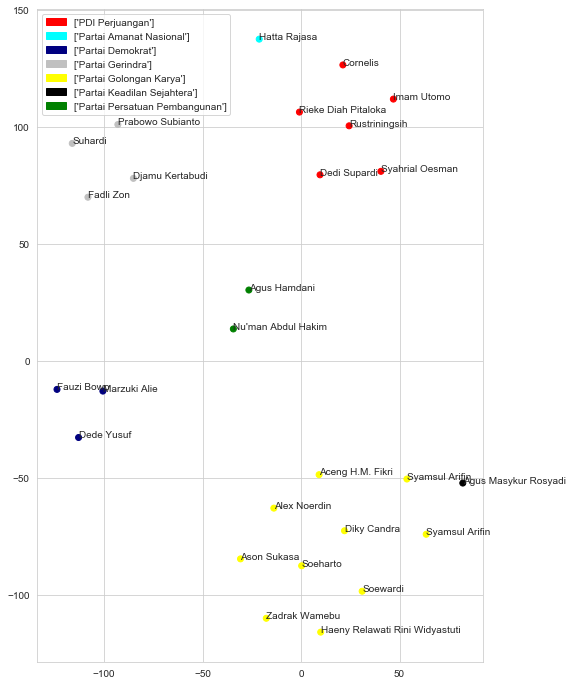

In [24]:
from sklearn.manifold import TSNE
import numpy as np

nodepolitikus = [x for x in df.Politikus]
embeddings = np.array([model.wv[x] for x in nodepolitikus])
tsne = TSNE(n_components=2, random_state=7,
perplexity=10)
embeddings_2d = tsne.fit_transform(embeddings)

warna_partai = {
    'PDI Perjuangan': 'red',
    'Partai Amanat Nasional': 'aqua',
    'Partai Demokrat': 'navy',
    'Partai Gerindra': 'silver',
    'Partai Golongan Karya': 'yellow',
    'Partai Keadilan Sejahtera': 'black',
    'Partai Persatuan Pembangunan': 'green'

}
df['color'] = df['Partai'].apply(lambda x: warna_partai[x])
warna_politikus= dict(zip(df['Politikus'], df['color']))
colors = [warna_politikus[x] for x in df.Politikus]

import matplotlib.patches as mpatches
figure = plt.figure(figsize=(8, 12))
ax = figure.add_subplot(111)
ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
i=0
for politikus in nodepolitikus:
    ax.annotate(politikus, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    i=i+1
partai_legend = [mpatches.Patch(color=color, label=df.Partai.unique())
for df.Partai, color in warna_partai.items()]

ax.legend(handles=partai_legend);

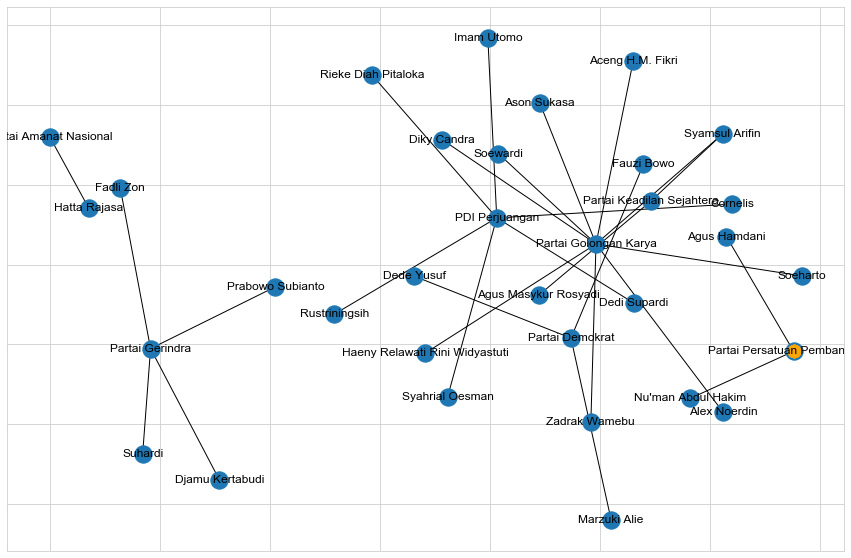

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
fig, ax = plt.subplots(figsize=(15,10))
layout = nx.spring_layout(g,iterations=10)
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True)
nx.draw_networkx_edges(g, layout, ax = ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)

partaipopuler = [partai for partai in df.Partai if
g.degree(partai) > 1]
nx.draw_networkx_nodes(g, layout,
nodelist=partaipopuler, node_color='orange',
node_size=150)

In [36]:
density = nx.density(g)
degree_dict = dict(g.degree(g.nodes()))
print("Nilai Density: ")
print(density)

Nilai Density: 
0.05113636363636364


(-0.7721258981078643,
 1.0890805812548376,
 -0.9145056330492635,
 0.8850221828589613)

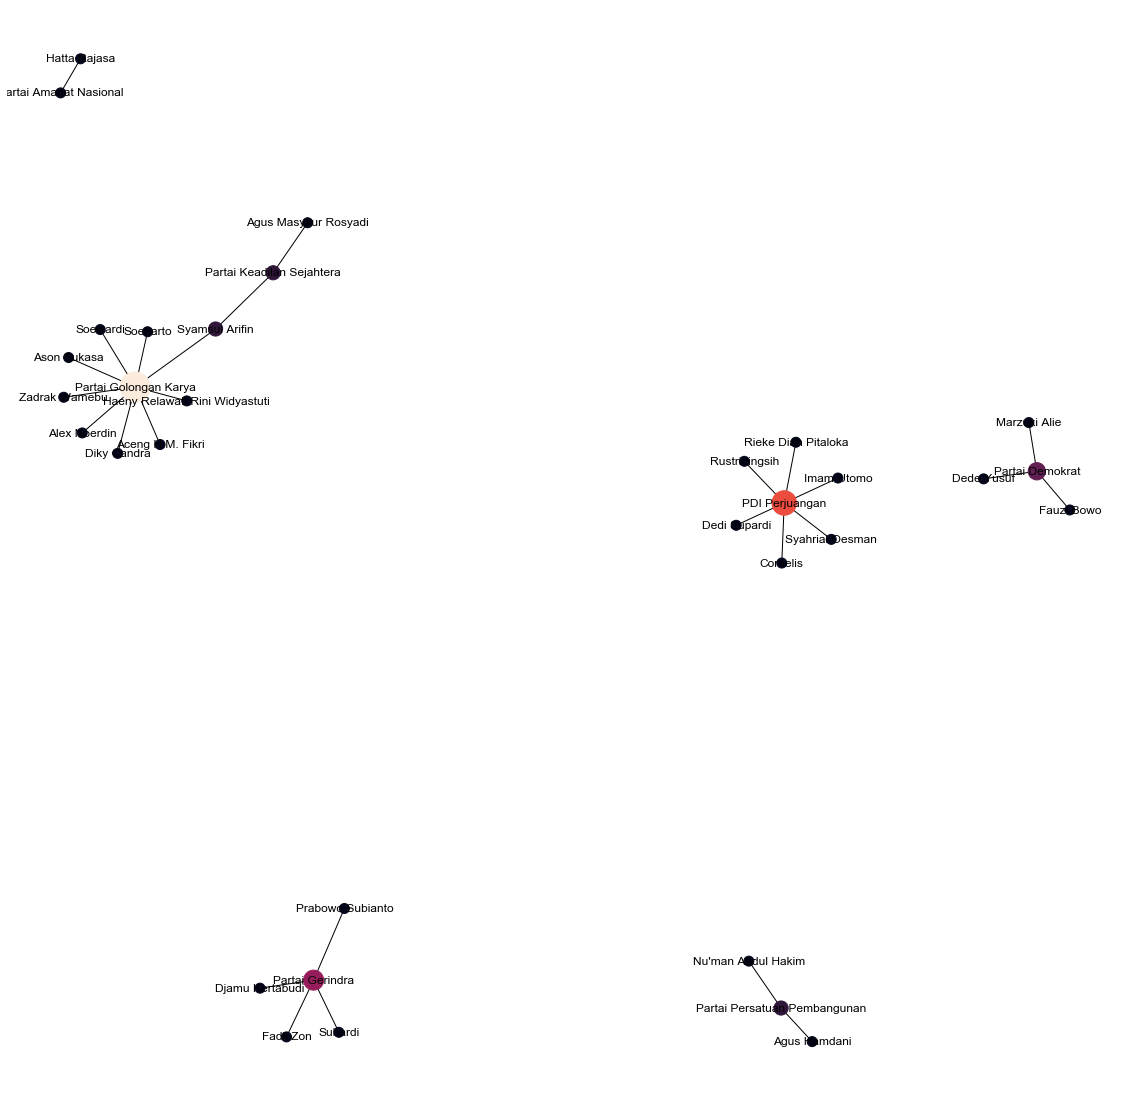

In [37]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size = [v * 100 for v in degree_dict.values()]
plt.figure(figsize=(20, 20))
nx.draw_networkx(g, pos=pos, with_labels=True,
node_color=node_color,
node_size=node_size )
plt.axis('off')

(-1.1114807616154598,
 0.9996522863393938,
 -0.8423561480297941,
 0.846711940327781)

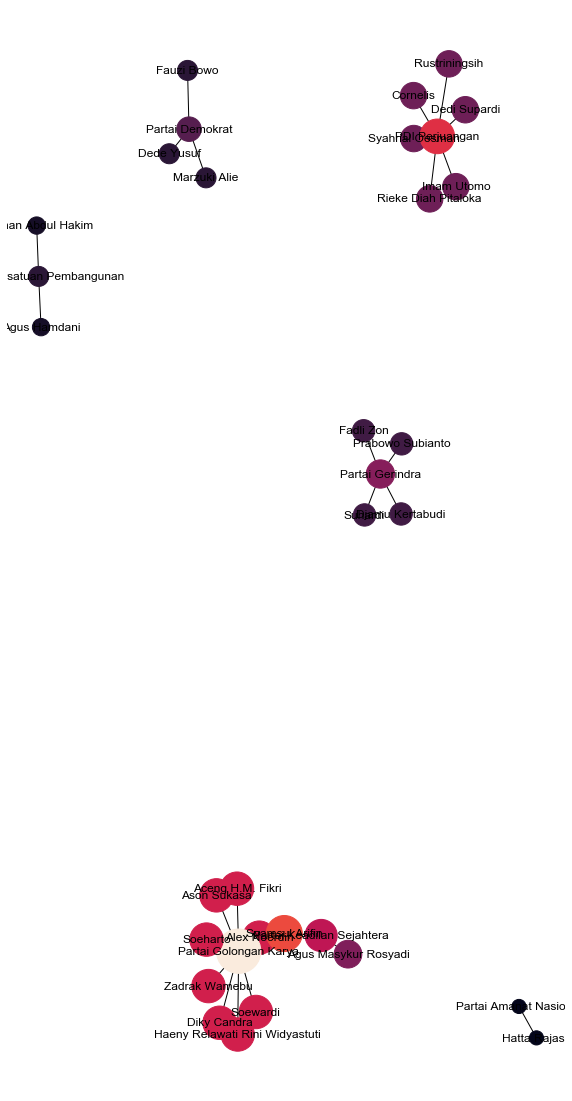

In [38]:
harmonic_dict = nx.harmonic_centrality(g)
nx.set_node_attributes(g, harmonic_dict, 'harmonic')
pos = nx.spring_layout(g)
node_color = [2000 * harmonic_dict[v] for v in g]
node_size = [v * 200 for v in harmonic_dict.values()]
plt.figure(figsize=(10,20))
nx.draw_networkx(g, pos=pos, with_labels=True,
node_color=node_color,
node_size=node_size )
plt.axis('off')

In [39]:
import operator

urutan_harmonic = sorted(harmonic_dict.items(), key=operator.itemgetter(1), reverse=True)
print("Urutan Lima Besar Harmonic Centrality Terbesar:")
for b in urutan_harmonic[:5]:
    print(b)

Urutan Lima Besar Harmonic Centrality Terbesar:
('Partai Golongan Karya', 9.833333333333334)
('Syamsul Arifin', 6.5)
('PDI Perjuangan', 6.0)
('Alex Noerdin', 5.583333333333333)
('Haeny Relawati Rini Widyastuti', 5.583333333333333)


In [40]:
import operator

urutan_harmonic = sorted(harmonic_dict.items(), key=operator.itemgetter(1), reverse=False)
print("Urutan Lima Besar Harmonic Centrality Terendah:")
for b in urutan_harmonic[:5]:
    print(b)

Urutan Lima Besar Harmonic Centrality Terendah:
('Hatta Rajasa', 1.0)
('Partai Amanat Nasional', 1.0)
('Agus Hamdani', 1.5)
("Nu'man Abdul Hakim", 1.5)
('Marzuki Alie', 2.0)
